In [1]:
import numpy as np

from robust_smc.data import LinearTANSimulator
from robust_smc.sampler import LinearDiagonalGaussianBPF

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
simulator = LinearTANSimulator(100, observation_std=20.0, seed=82)

In [3]:
num_samples = 1000
prior_std = np.array([1e-1, 1e-1, 1.0, 1e-2, 1e-2, 1e-1])
# prior_std = simulator.process_std
transition_matrix = simulator.transition_matrix
# x_init = np.zeros((num_samples, 6))
x_init = np.repeat(simulator.X0[None, :], num_samples, axis=0)
noise_std = 20.0

In [4]:
sampler = LinearDiagonalGaussianBPF(simulator.Y, transition_matrix=transition_matrix, 
                                    noise_std=noise_std, prior_std=prior_std, 
                                    x_init=x_init, observation_model=simulator.observation_model,
                                    num_samples=num_samples
                                   )

In [5]:
sampler.sample()

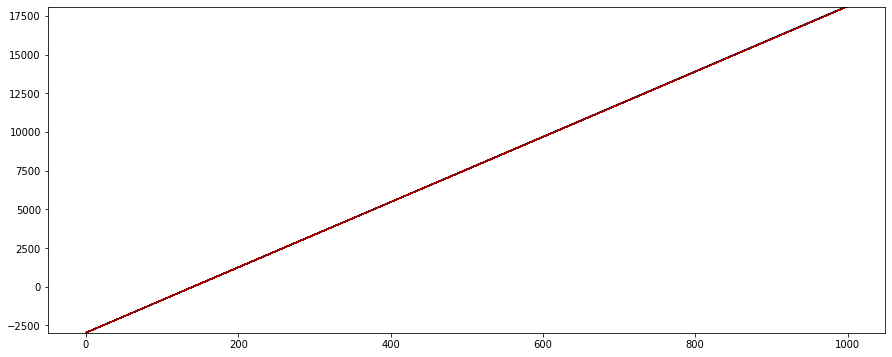

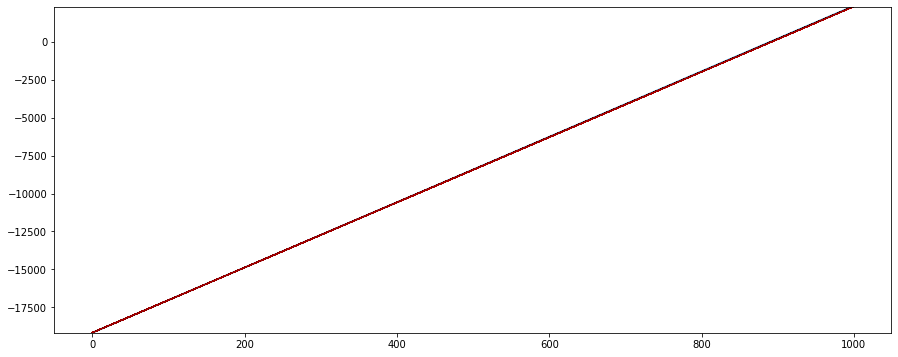

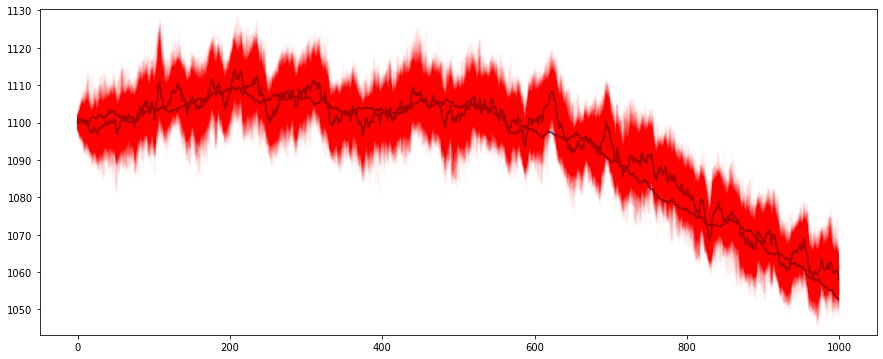

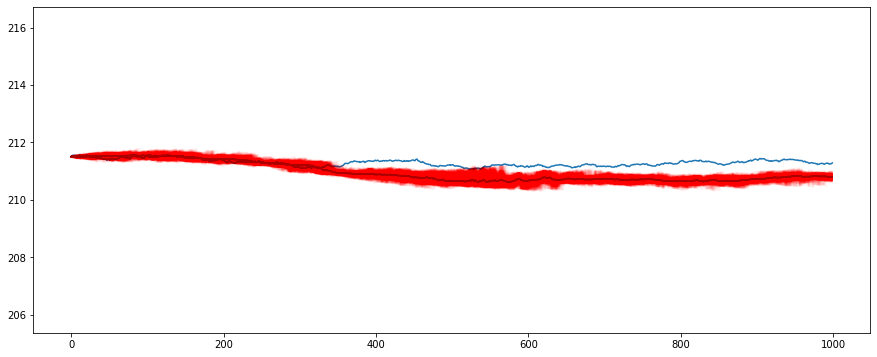

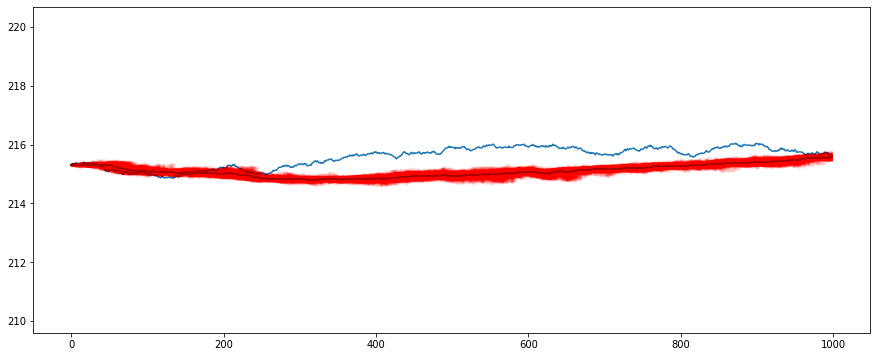

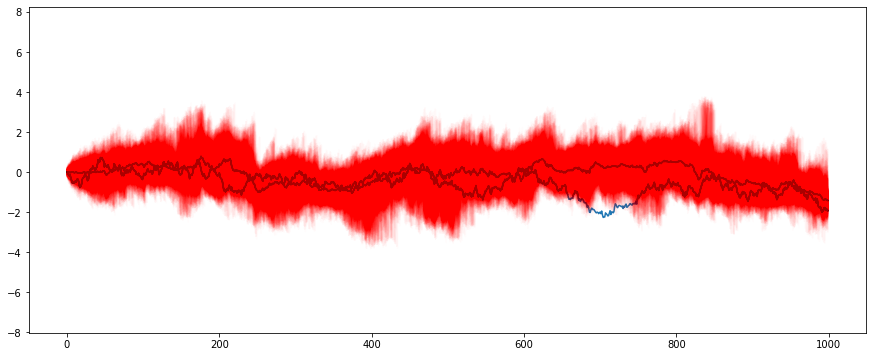

In [10]:
for var in range(6):
    plt.figure(figsize=(15, 6))
    traj = np.stack(sampler.x_trajectories)
    plt.plot(simulator.X[1:, var])
    plt.plot(traj[:, :, var].mean(axis=1), c='k', alpha=0.8, ls='-')
    for i in range(num_samples):
        plt.plot(traj[:, i, var], c='r', alpha=0.01, ls='-')
        lims = (np.min(traj[:, i, var]), np.max(traj[:, i, var]))
        plt.ylim(lims[0] - 5., lims[1] + 5.0)
    plt.savefig(f'./figures/linear-bpf-trajectories_{var}.png', dp=300)

In [7]:
from scipy.special import logsumexp
def normalised_weights(logw):
    return np.exp(logw - logsumexp(logw))

In [8]:
normalised_weights(sampler.logw[-1] - logsumexp(sampler.logw[-1]))

array([[0.00096144],
       [0.0011162 ],
       [0.00087009],
       [0.00103625],
       [0.00092513],
       [0.00083347],
       [0.00106877],
       [0.00097821],
       [0.00109328],
       [0.00119363],
       [0.00109221],
       [0.0009395 ],
       [0.00098322],
       [0.00089658],
       [0.00104841],
       [0.00099907],
       [0.00107009],
       [0.00113345],
       [0.00118967],
       [0.00117271],
       [0.00094285],
       [0.00112222],
       [0.00105794],
       [0.00105245],
       [0.00093219],
       [0.00097635],
       [0.00104477],
       [0.00117534],
       [0.00107788],
       [0.00100301],
       [0.00087503],
       [0.00093284],
       [0.00098393],
       [0.00096561],
       [0.00100886],
       [0.00092304],
       [0.00094458],
       [0.00098145],
       [0.00116093],
       [0.00123366],
       [0.00106085],
       [0.00103657],
       [0.00097053],
       [0.00085993],
       [0.00100796],
       [0.00089325],
       [0.00111689],
       [0.001